In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Scen_gen():
    def __init__(self, spot, drift, vol):
        self.spot = spot
        self.drift = drift
        self.vol = vol
        
    def LV(self, s, t):
        
        
    def MC(self, sims, timesteps, dt):
        x = np.zeros((sims, timesteps))
        for i in range(sims):
            x[i, 0] = self.spot
            for j in range(1, timesteps):
                z1 = np.random.normal(0,1)
                local_vol = LV(x[i, j - 1], j * dt)
                x[i,j] = x[i, j-1] * np.exp((self.drift - 0.5 * self.vol ** 2)* dt + (self.vol * dt ** 0.5 * z1))
        return x
                                            
                                            


In [16]:
# Create an instance of Scen_gen with spot, drift, and vol parameters
scenario = Scen_gen(spot=100, drift=0.05, vol=0.2)

# Run a Monte Carlo simulation with 1000 simulations, 100 time steps, and a time increment of 0.01
simulations = scenario.MC(sims=1000, timesteps=100, dt=0.01)

# You can now analyze or visualize the simulation results, e.g., plot the scenarios
for i in range(1000):
    plt.plot(simulations[i])
plt.xlabel('Time Step')
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulations')
plt.show()


NameError: name 'LV' is not defined

Implied volatility grid has been written to 'implied_volatility_grid.txt'.


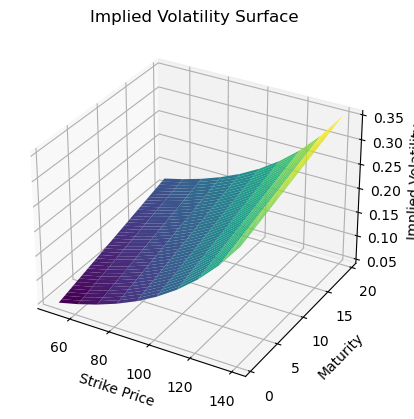

In [38]:
strikes = np.arange(50, 150, 10)
maturities = np.arange(0.5, 20, 0.5)

grid = np.zeros((len(strikes), len(maturities)))

def implied_volatility_smile(strike, maturity):
    a = 0.5  # Parameter controlling the smile shape
    b = 0.02  # Parameter controlling the smile shift
    c = 0.6  # Parameter controlling the slope of volatility with maturity
    return (a * np.exp(b * strike) + 0.2 * (c * maturity))/30

for i in range(len(strikes)):
    for j in range(len(maturities)):
        implied_volatility = implied_volatility_smile(strikes[i], maturities[j])
        grid[i,j] = implied_volatility 
        
#print(grid)

filename = "implied_volatility_grid.txt"

with open(filename, "w") as file:
    file.write("\t" + "\t".join(map(str, maturities)) + "\n")
    for i in range(len(strikes)):
        file.write(str(strikes[i]) + "\t" + "\t".join(map(str, grid[i])) + "\n")

print(f"Implied volatility grid has been written to '{filename}'.")

strike_grid, maturity_grid = np.meshgrid(strikes, maturities)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strike_grid, maturity_grid, grid.T, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')

# Set a title for the plot
ax.set_title('Implied Volatility Surface')

# Show the plot
plt.show()